# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from typing import List
from sklearn.preprocessing import StandardScaler

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

Your tasks:
* Import data from the provided GitHub repo using `pandas`
* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`
* You may need to change column names to make them easier to work with
* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method

Data files to import: 
1. GDP
2. Inflation 
3. Apple stock prices 
4. Microsoft stock prices

In [2]:
# Load historical GDP data
def load_historical_data(filename: str) -> pd.DataFrame:
    df = pd.read_csv(filename)
    df.title = Path(filename).stem.upper()
    df.columns = df.columns.str.upper()
    return df

In [3]:
df_gdp = load_historical_data(filename='gdp.csv')

In [4]:
# Check the first few rows of data
df_gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [5]:
# Load the historical stock price data for Apple and Microsoft
df_apple = load_historical_data('apple_historical_data.csv')
df_microsoft = load_historical_data('microsoft_historical_data.csv')

In [6]:
# Check the first few rows of data
df_apple.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW
0,5/3/2024,$183.38,163224100,$186.65,$187.00,$182.66
1,5/2/2024,$173.03,94214920,$172.51,$173.42,$170.89
2,5/1/2024,$169.30,50383150,$169.58,$172.71,$169.11
3,4/30/2024,$170.33,65934780,$173.33,$174.99,$170.00
4,4/29/2024,$173.50,68169420,$173.37,$176.03,$173.10


In [7]:
df_microsoft.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW
0,05/03/2024,$406.66,17446720,$402.28,$407.15,$401.86
1,05/02/2024,$397.84,17709360,$397.66,$399.93,$394.6515
2,05/01/2024,$394.94,23562480,$392.61,$401.7199,$390.31
3,04/30/2024,$389.33,28781370,$401.49,$402.16,$389.17
4,04/29/2024,$402.25,19582090,$405.25,$406.32,$399.19


In [8]:
# Use methods like .info() and .describe() to explore the data
def explore_data(df: pd.DataFrame):
    print(df.title) 
    print("\n--- DataFrame Info ---")
    df.info()
    print("\n--- Descriptive Statistics ---")
    print(df.describe(include='all'))  # includes non-numeric columns too

In [9]:
explore_data(df_gdp)

GDP

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    309 non-null    object 
 1   GDP     309 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.0+ KB

--- Descriptive Statistics ---
              DATE           GDP
count          309    309.000000
unique         309           NaN
top     2024-01-01           NaN
freq             1           NaN
mean           NaN   7227.754935
std            NaN   7478.297734
min            NaN    243.164000
25%            NaN    804.981000
50%            NaN   4386.773000
75%            NaN  12527.214000
max            NaN  28284.498000


In [10]:
explore_data(df_apple)

APPLE_HISTORICAL_DATA

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        2517 non-null   object
 1   CLOSE/LAST  2514 non-null   object
 2   VOLUME      2517 non-null   int64 
 3   OPEN        2517 non-null   object
 4   HIGH        2517 non-null   object
 5   LOW         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB

--- Descriptive Statistics ---
            DATE CLOSE/LAST        VOLUME     OPEN     HIGH      LOW
count       2517       2514  2.517000e+03     2517     2517     2517
unique      2517       2152           NaN     2143     2155     2177
top     5/6/2014    $43.56            NaN  $28.58   $29.13   $32.08 
freq           1          5           NaN        4        7        5
mean         NaN        NaN  1.277394e+08      NaN      NaN      NaN
std          NaN        NaN  7

In [11]:
explore_data(df_microsoft)

MICROSOFT_HISTORICAL_DATA

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        2517 non-null   object
 1   CLOSE/LAST  2517 non-null   object
 2   VOLUME      2517 non-null   int64 
 3   OPEN        2517 non-null   object
 4   HIGH        2517 non-null   object
 5   LOW         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB

--- Descriptive Statistics ---
              DATE CLOSE/LAST        VOLUME    OPEN    HIGH      LOW
count         2517       2517  2.517000e+03    2517    2517     2517
unique        2517       2332           NaN    2356    2348     2359
top     05/06/2014     $62.30           NaN  $45.45  $47.77  $135.00
freq             1          4           NaN       4       4        3
mean           NaN        NaN  2.953106e+07     NaN     NaN      NaN
std            NaN        

In [12]:
df_apple.describe()

,VOLUME
count,2.517000e+03
mean,1.277394e+08
std,7.357405e+07
min,2.404834e+07
25%,7.741776e+07
50%,1.077601e+08
75%,1.567789e+08
max,7.576780e+08


In [13]:
df_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        2517 non-null   object
 1   CLOSE/LAST  2517 non-null   object
 2   VOLUME      2517 non-null   int64 
 3   OPEN        2517 non-null   object
 4   HIGH        2517 non-null   object
 5   LOW         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB


In [14]:
df_microsoft.describe()

,VOLUME
count,2.517000e+03
mean,2.953106e+07
std,1.370138e+07
min,7.425603e+06
25%,2.131892e+07
50%,2.639470e+07
75%,3.360003e+07
max,2.025141e+08


## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [15]:
# Check for nulls 
def check_for_nulls(df: pd.DataFrame):
    print(df.title)
    if df.isnull().values.any():
        print(df.isnull().sum())
    else:
        print('OK - No nulls')

In [16]:
check_for_nulls(df_apple)

APPLE_HISTORICAL_DATA
DATE          0
CLOSE/LAST    3
VOLUME        0
OPEN          0
HIGH          0
LOW           0
dtype: int64


In [17]:
# Forward fill any missing data
def forward_fill(df: pd.DataFrame):
    df.ffill(inplace=True)

In [18]:
forward_fill(df_apple)

In [19]:
# Check again for nulls after using forward fill
check_for_nulls(df_apple)

APPLE_HISTORICAL_DATA
OK - No nulls


## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [20]:
def convert_dollar_columns_to_numeric(df: pd.DataFrame, numeric_columns: List[str]):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''

    for numeric_column in numeric_columns:
       df[numeric_column] = df[numeric_column].replace({'\$': ''}, regex=True).astype(float)
    
    pass 

In [21]:
convert_dollar_columns_to_numeric(df_apple, ['CLOSE/LAST', 'OPEN', 'HIGH', 'LOW' ])
convert_dollar_columns_to_numeric(df_microsoft, ['CLOSE/LAST', 'OPEN', 'HIGH', 'LOW' ])

In [22]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format
def convert_datetime_columns_to_datetime(df: pd.DataFrame, datetime_columns: List[str]):
    '''
        Casts the columns to a datetime datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            datetime: columns that should have datetime data but are defined as object datatime
            
        Returns:
            None - changes to the dataframe can be made in place
    '''

    for col in datetime_columns:
        df[col] = pd.to_datetime(df[col])

In [23]:
convert_datetime_columns_to_datetime(df_apple, ['DATE'])
convert_datetime_columns_to_datetime(df_microsoft, ['DATE'])

In [24]:
# Use .info() and check the type of each column to ensure that the above steps worked
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        2517 non-null   datetime64[ns]
 1   CLOSE/LAST  2517 non-null   float64       
 2   VOLUME      2517 non-null   int64         
 3   OPEN        2517 non-null   float64       
 4   HIGH        2517 non-null   float64       
 5   LOW         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


In [25]:
df_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        2517 non-null   datetime64[ns]
 1   CLOSE/LAST  2517 non-null   float64       
 2   VOLUME      2517 non-null   int64         
 3   OPEN        2517 non-null   float64       
 4   HIGH        2517 non-null   float64       
 5   LOW         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB


## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [26]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
df_inflation = load_historical_data('inflation_monthly.csv')
df_inflation.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


In [27]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  675 non-null    object 
 1   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.7+ KB


In [28]:
convert_datetime_columns_to_datetime(df_inflation, ['DATE'])

In [29]:
def align_date_to_end_of_month(df: pd.DataFrame, cols: List[str]):
    for col in cols:
        df[col] = df[col] + pd.offsets.MonthEnd(0)

In [30]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  675 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


In [31]:
align_date_to_end_of_month(df_inflation, ['DATE'])

In [32]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  675 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


In [33]:
df_inflation.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [34]:
# Upsample and interpolate from monthly to weekly 
def upsample_monthly_to_weekly(df: pd.DataFrame, col: str):
    df_copy = df.copy()
    df_copy.set_index(col, inplace=True)
    df_copy = df_copy.resample('W').asfreq()
    df_copy = df_copy.interpolate(method='linear')
    return df_copy


In [35]:
df_inflation_weekly = upsample_monthly_to_weekly(df_inflation, 'DATE')

In [36]:
df_inflation_weekly.head(n = 20)

,CORESTICKM159SFRBATL
DATE,
1968-02-04,NaN
1968-02-11,NaN
1968-02-18,NaN
1968-02-25,NaN
1968-03-03,NaN
1968-03-10,NaN
1968-03-17,NaN
1968-03-24,NaN
1968-03-31,4.142164


In [37]:
# Downsample from monthly to quarterly 
def downsample_monthly_to_quarterly(df: pd.DataFrame, col: str):
    df_copy = df.copy()
    df_copy.set_index(col, inplace=True)
    return df_copy.resample('QE').mean()


In [38]:
df_inflation_quarterly = downsample_monthly_to_quarterly(df_inflation, 'DATE')

In [39]:
df_inflation_quarterly.head()

,CORESTICKM159SFRBATL
DATE,
1968-03-31,3.822615
1968-06-30,4.263214
1968-09-30,4.882643
1968-12-31,5.429443
1969-03-31,5.873770


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [40]:
# Standardize the GDP measure
scaler = StandardScaler()
df_gdp['GDP'] = scaler.fit_transform(df_gdp[['GDP']])

In [41]:
# Check the dataframe to make sure the calculation worked as expected 
df_gdp.describe()

,GDP
count,3.090000e+02
mean,-1.839593e-16
std,1.001622e+00
min,-9.354964e-01
25%,-8.602482e-01
50%,-3.805131e-01
75%,7.097946e-01
max,2.820281e+00


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [42]:
df_apple.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW
0,2024-05-03,183.38,163224100,186.65,187.00,182.66
1,2024-05-02,173.03,94214920,172.51,173.42,170.89
2,2024-05-01,169.30,50383150,169.58,172.71,169.11
3,2024-04-30,170.33,65934780,173.33,174.99,170.00
4,2024-04-29,173.50,68169420,173.37,176.03,173.10


In [43]:
# Get max date in timeseries
max_date = df_apple['DATE'].max()
max_date

Timestamp('2024-05-03 00:00:00')

In [44]:
# Use the max date calculated above to get the last three months of data in the dataset 
from pandas.tseries.offsets import DateOffset

def get_last_x_months_of_data(df: pd.DataFrame, date_col:str, last_x_months: int) -> pd.DataFrame:
    max_date = df[date_col].max()
    start_date = max_date - DateOffset(months=last_x_months)

    df_copy = df.copy()

    return df_copy[df_copy[date_col] > start_date] 

In [45]:
df_apple_last_3_months = get_last_x_months_of_data(df_microsoft, date_col='DATE', last_x_months=3)

In [46]:
df_apple_last_3_months

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW
0,2024-05-03,406.66,17446720,402.28,407.1500,401.8600
1,2024-05-02,397.84,17709360,397.66,399.9300,394.6515
2,2024-05-01,394.94,23562480,392.61,401.7199,390.3100
3,2024-04-30,389.33,28781370,401.49,402.1600,389.1700
4,2024-04-29,402.25,19582090,405.25,406.3200,399.1900
...,...,...,...,...,...,...
58,2024-02-09,420.55,22032840,415.25,420.8200,415.0900
59,2024-02-08,414.11,21225260,414.05,415.5600,412.5300
60,2024-02-07,414.05,22340530,407.44,414.3000,407.4000
61,2024-02-06,405.49,18382620,405.88,407.9700,402.9100


In [47]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data
def plot_line_open_vs_close(df: pd.DataFrame, stock: str):
    plt.figure(figsize=(12, 6))
    plt.plot(df['DATE'], df['OPEN'], label='Open', linewidth=2, color='blue')
    plt.plot(df['DATE'], df['CLOSE/LAST'], label='Close', linewidth=2, color='red')
    plt.title(f'Open vs. Closed Over Time for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

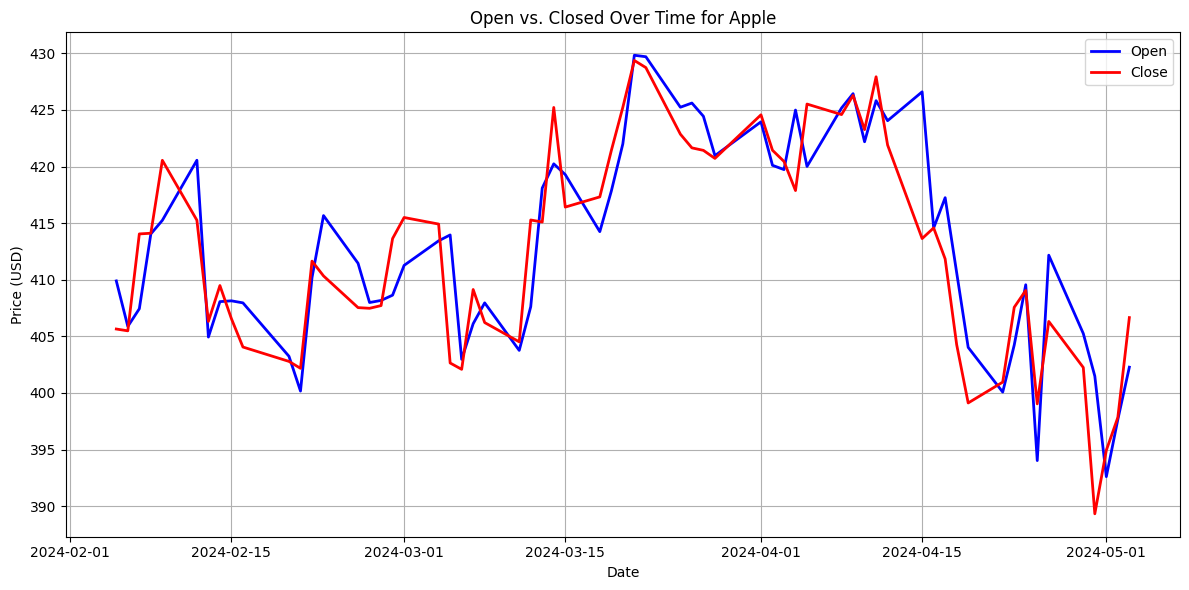

In [48]:
plot_line_open_vs_close(df_apple_last_3_months, "Apple")

## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

In [49]:
# Plot the histogram of Apple's closing price over the last 3 months 
def plot_histogram_close(df: pd.DataFrame, stock: str):
    plt.figure(figsize=(10, 6))
    plt.hist(df['CLOSE/LAST'], bins=50, edgecolor='blue')
    plt.title(f'Histogram of Closing Prices for {stock}')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

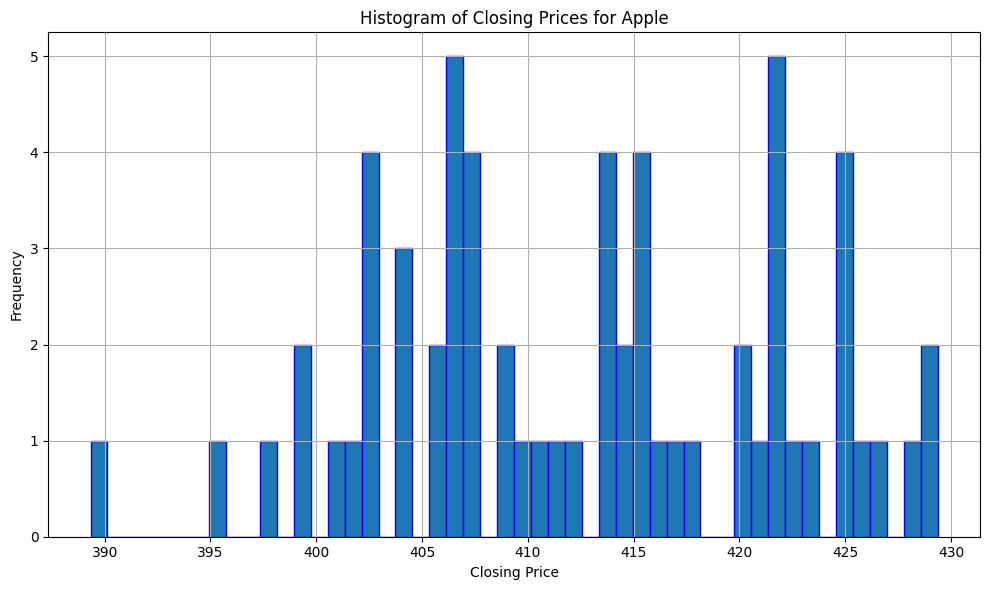

In [50]:
plot_histogram_close(df_apple_last_3_months, "Apple")

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [51]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
def calculate_percent_change(df: pd.DataFrame, period: int = 1): 
    df[f'{str(period)}_DAY_RETURN'] = df['CLOSE/LAST'].pct_change(period)

In [52]:
calculate_percent_change(df_apple)
calculate_percent_change(df_microsoft)

In [53]:
df_microsoft.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,1_DAY_RETURN
0,2024-05-03,406.66,17446720,402.28,407.1500,401.8600,NaN
1,2024-05-02,397.84,17709360,397.66,399.9300,394.6515,-0.021689
2,2024-05-01,394.94,23562480,392.61,401.7199,390.3100,-0.007289
3,2024-04-30,389.33,28781370,401.49,402.1600,389.1700,-0.014205
4,2024-04-29,402.25,19582090,405.25,406.3200,399.1900,0.033185


In [54]:
df_apple.head()

,DATE,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,1_DAY_RETURN
0,2024-05-03,183.38,163224100,186.65,187.00,182.66,NaN
1,2024-05-02,173.03,94214920,172.51,173.42,170.89,-0.056440
2,2024-05-01,169.30,50383150,169.58,172.71,169.11,-0.021557
3,2024-04-30,170.33,65934780,173.33,174.99,170.00,0.006084
4,2024-04-29,173.50,68169420,173.37,176.03,173.10,0.018611


In [55]:
df_inflation['INFLATION_CHANGE'] = df_inflation['CORESTICKM159SFRBATL'].pct_change()
df_inflation.head()

,DATE,CORESTICKM159SFRBATL,INFLATION_CHANGE
0,1968-01-31,3.651861,NaN
1,1968-02-29,3.673819,0.006013
2,1968-03-31,4.142164,0.127482
3,1968-04-30,4.155828,0.003299
4,1968-05-31,4.088245,-0.016262


### 2. Interpolate stock returns from daily to monthly

In [56]:
def resample_returns_daily_to_monthly(df: pd.DataFrame) -> pd.DataFrame:
    df_copy = df.copy()
    df_copy['1_MONTH_RETURN'] = (1 + df_copy['1_DAY_RETURN']).resample('ME').prod() - 1

    df_copy_filtered = df_copy[df_copy['1_MONTH_RETURN'].notna()] 
    
    return df_copy_filtered 

In [57]:
def set_index_and_sort_by_index(df: pd.DataFrame, col):
    df.set_index(col, inplace=True)
    df = df.sort_index()

In [58]:
set_index_and_sort_by_index(df_apple, 'DATE')

In [59]:
set_index_and_sort_by_index(df_microsoft, 'DATE')

In [60]:
df_apple_monthly = resample_returns_daily_to_monthly(df_apple)

In [61]:
df_microsoft_monthly = resample_returns_daily_to_monthly(df_microsoft)

In [62]:
df_apple_monthly.head()

,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,1_DAY_RETURN,1_MONTH_RETURN
DATE,,,,,,,
2024-04-30,170.33,65934780,173.33,174.99,170.00,0.006084,0.004312
2024-02-29,180.75,136682600,181.27,182.57,179.53,0.006067,0.040076
2024-01-31,184.40,55467800,187.04,187.10,184.35,-0.013165,-0.006529
2023-11-30,189.95,48794370,189.84,190.32,188.19,-0.006745,-0.090305
2023-10-31,170.77,44846020,169.35,170.90,167.90,-0.018394,-0.001265


In [63]:
df_microsoft_monthly.head()

,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,1_DAY_RETURN,1_MONTH_RETURN
DATE,,,,,,,
2024-04-30,389.33,28781370,401.49,402.16,389.17,-0.014205,0.075024
2024-02-29,413.64,31947260,408.64,414.20,405.92,-0.004477,-0.028207
2024-01-31,397.58,47871100,406.96,415.32,397.21,-0.015355,-0.081505
2023-11-30,378.91,30554420,378.49,380.09,375.47,0.011749,-0.075939
2023-10-31,338.11,20265280,338.85,339.00,334.69,-0.023001,-0.070130


In [64]:
set_index_and_sort_by_index(df_inflation, 'DATE')

In [65]:
df_inflation.head()

,CORESTICKM159SFRBATL,INFLATION_CHANGE
DATE,,
1968-01-31,3.651861,NaN
1968-02-29,3.673819,0.006013
1968-03-31,4.142164,0.127482
1968-04-30,4.155828,0.003299
1968-05-31,4.088245,-0.016262


### 3. Merge the dataframes and calculate / plot the correlation

In [66]:
df_apple_monthly = df_apple_monthly.add_prefix('AAPL_')
df_microsoft_monthly = df_microsoft_monthly.add_prefix('MSFT_')

In [67]:
df_apple_monthly = df_apple_monthly['AAPL_1_MONTH_RETURN']
df_microsoft_monthly = df_microsoft_monthly['MSFT_1_MONTH_RETURN']
df_inflation = df_inflation['INFLATION_CHANGE']

In [68]:
df_apple_monthly = df_apple_monthly.to_frame()
df_microsoft_monthly = df_microsoft_monthly.to_frame()
df_inflation = df_inflation.to_frame()

df_joined = df_inflation.join([df_apple_monthly, df_microsoft_monthly], how='inner')
df_joined.head()

,INFLATION_CHANGE,AAPL_1_MONTH_RETURN,MSFT_1_MONTH_RETURN
DATE,,,
2014-06-30,0.007147,-0.039778,-0.025794
2014-07-31,-0.020724,-0.027050,-0.023098
2014-09-30,-0.004516,0.041532,-0.017647
2014-10-31,0.026302,-0.093236,-0.032462
2014-12-31,-0.018969,0.052689,0.039778


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [69]:
# Calculate correlation matrix
corr = df_joined.corr()
corr

,INFLATION_CHANGE,AAPL_1_MONTH_RETURN,MSFT_1_MONTH_RETURN
INFLATION_CHANGE,1.000000,0.019863,0.066042
AAPL_1_MONTH_RETURN,0.019863,1.000000,0.629182
MSFT_1_MONTH_RETURN,0.066042,0.629182,1.000000


### 5. Plot the correlation matrix as a heatmap 

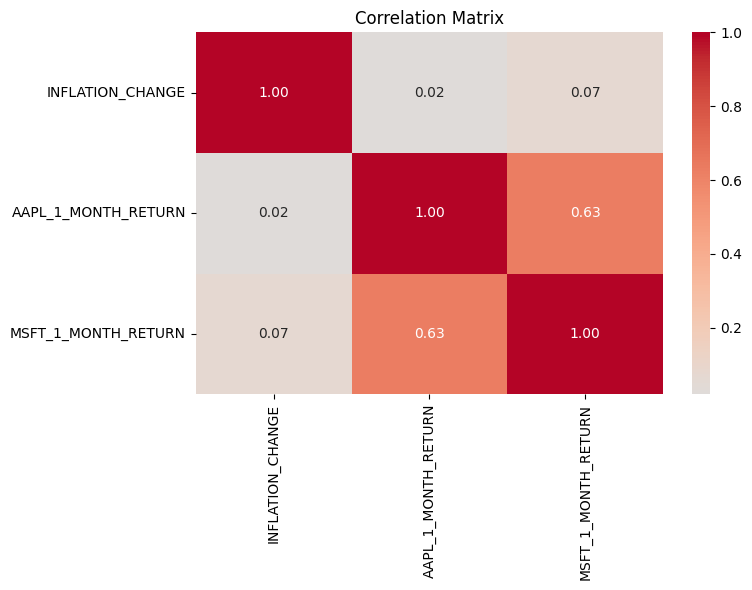

In [70]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [71]:
# Define the window size for the rolling calculation (e.g., one week)

window = 5 # 5 trading days

In [72]:
# Calculate rolling one-week volatility
set_index_and_sort_by_index(df_apple_last_3_months, 'DATE')
calculate_percent_change(df_apple_last_3_months)

In [73]:
def calculate_rolling_volatility(df: pd.DataFrame, window = 5):
    df[f'{window}_DAY_ROLLING_VOLATILITY'] = df['1_DAY_RETURN'].rolling(window=5).std()

In [74]:
calculate_rolling_volatility(df_apple_last_3_months, window)
df_apple_last_3_months.head(10)

,CLOSE/LAST,VOLUME,OPEN,HIGH,LOW,1_DAY_RETURN,5_DAY_ROLLING_VOLATILITY
DATE,,,,,,,
2024-05-03,406.66,17446720,402.280,407.1500,401.8600,NaN,NaN
2024-05-02,397.84,17709360,397.660,399.9300,394.6515,-0.021689,NaN
2024-05-01,394.94,23562480,392.610,401.7199,390.3100,-0.007289,NaN
2024-04-30,389.33,28781370,401.490,402.1600,389.1700,-0.014205,NaN
2024-04-29,402.25,19582090,405.250,406.3200,399.1900,0.033185,NaN
2024-04-26,406.32,29694650,412.170,413.0000,405.7601,0.010118,0.021960
2024-04-25,399.04,40586450,394.030,399.8899,388.0300,-0.017917,0.021074
2024-04-24,409.06,15065330,409.560,412.4700,406.7800,0.025110,0.022878
2024-04-23,407.57,15734500,404.235,408.2000,403.0600,-0.003642,0.020793


In [75]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes

def plot_rolling_volatility(df: pd.DataFrame):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot closing price on left y-axis
    ax1.plot(df.index, df['CLOSE/LAST'], color='blue', label='Close Price')
    ax1.set_ylabel('Close Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create second y-axis sharing the same x-axis
    ax2 = ax1.twinx()
    
    # Plot rolling volatility on right y-axis
    ax2.plot(df.index, df['5_DAY_ROLLING_VOLATILITY'], color='red', label='5-Day Volatility')
    ax2.set_ylabel('5-Day Rolling Volatility', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Title and layout
    plt.title('Close Price vs 5-Day Rolling Volatility')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

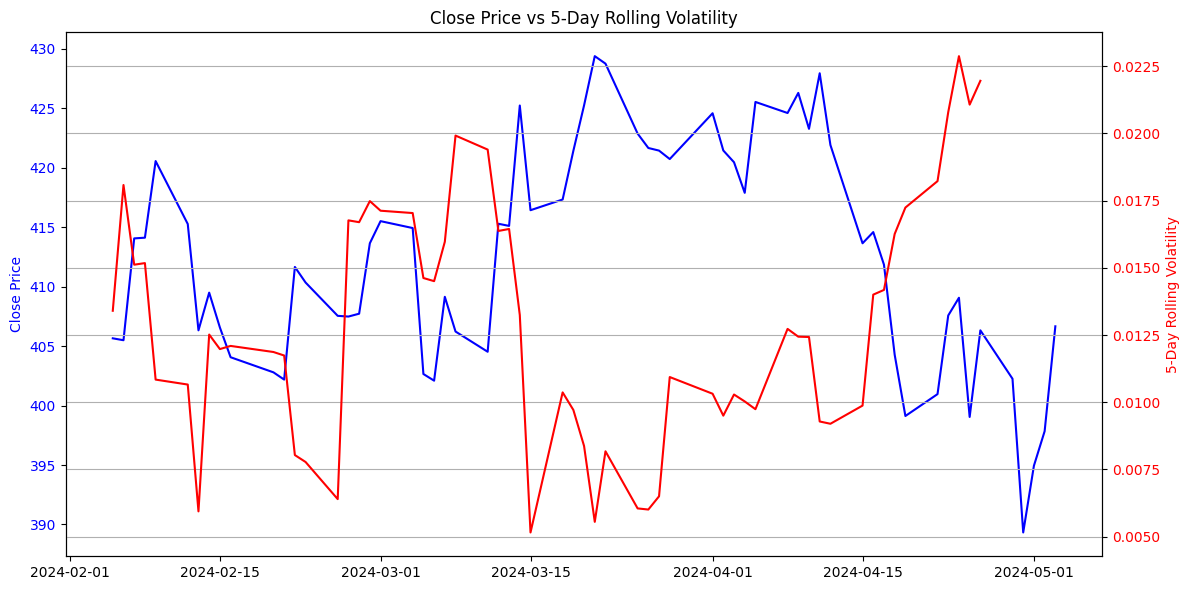

In [76]:
plot_rolling_volatility(df_apple_last_3_months)

## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [78]:
def export_data(df: pd.DataFrame, filename:str):
    df.to_csv(filename, encoding='utf-8-sig')

In [81]:
# export inflation
export_data(df_inflation, 'export_inflation.csv')
export_data(df_inflation_weekly, 'export_inflation_weekly.csv')
export_data(df_inflation_quarterly, 'export_inflation_quarterly.csv')
# export apple
export_data(df_apple, 'export_apple.csv')
export_data(df_apple_monthly, 'export_apple_monthly.csv')
export_data(df_apple_last_3_months, 'export_apple_last_3_months')
# export microsoft
export_data(df_microsoft, 'export_microsoft.csv')
export_data(df_microsoft_monthly, 'export_microsoft_monthly.csv')
# export joined
export_data(df_joined, 'export_joined.csv')